# Exploring Keyboard Data

1. Load the data
    - Create a dataframe of all data folders
    - additional features are Name of user, filename, Keyboard Material, microphone
2. Clean up where it's unknown
    - Impute values from online, or set generic value.


End result: One dataframe of information

Cluster data

Visualize those clusters

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import yaml

In [2]:
# Define the path to the data folder
data_folder = '../data/'

# Initialize an empty list to store the data
key_data_list = []
sentence_data_list = []

# Loop through all user folders in the data folder
for user_folder in os.listdir(data_folder):
    if 'Keystroke' in user_folder:
        continue
    user_folder_path = os.path.join(data_folder, user_folder)
    if os.path.isdir(user_folder_path):  # Check if it's a directory
        key_folder_path = os.path.join(user_folder_path, 'data', 'key_data')
        sentence_folder_path = os.path.join(user_folder_path, 'data', 'sentence_data')

        # Key data, then sentence data
        # for internal_folder in [key_folder_path, sentence_folder_path]:
        for file_name in os.listdir(key_folder_path):
            # key_folder_path = os.path.join(data_folder, user_folder)
            # Check if the file is a YAML file
            if file_name.endswith('.yaml'):
                # Extract key_pressed value from the filename
                key_pressed = file_name.split('_')[2]
                
                # Construct the full path to the YAML file
                yaml_file_path = os.path.join(key_folder_path, file_name)
                
                # Read the YAML file and filter out the 'key_pressed' field and subsequent lines until 'keyboard_name'
                with open(yaml_file_path, 'r') as file:
                    lines = file.readlines()
                
                filtered_lines = []
                skip = False
                for line in lines:
                    if line.strip().startswith('key_pressed:'):
                        skip = True
                    if skip and line.strip().startswith('keyboard_name:'):
                        skip = False
                    if not skip:
                        filtered_lines.append(line)
                
                # Load the filtered lines into a dictionary
                yaml_data = yaml.safe_load(''.join(filtered_lines))
                
                # Add the user, audio file name, and key_pressed information
                yaml_data['user'] = user_folder
                yaml_data['audio_file'] = file_name.replace('.yaml', '.wav')  # Assuming audio files are in .wav format
                yaml_data['key_pressed'] = key_pressed
                
                # Append the data to the list
                key_data_list.append(yaml_data)

# Convert the list of dictionaries to a DataFrame
key_df = pd.DataFrame(key_data_list)
sentence_df = pd.DataFrame(sentence_data_list)

# Display the DataFrame
key_df.head()

,default_high_input_latency,default_high_output_latency,default_low_input_latency,default_low_output_latency,default_samplerate,hostapi,index,keyboard_name,keyboard_size,keyboard_type,max_input_channels,max_output_channels,name,switch_color,timestamp,user,audio_file,key_pressed
0,0.18,0.18,0.09,0.09,44100.0,0,1,Keychron Q3,80%_Tenkeyless,mechanical,2,0,Microphone (3- USB PnP Audio De,Cherry MX Speed Silver,1720063585,Brian,key_press_[_1720063585_Brian.wav,[
1,0.18,0.18,0.09,0.09,44100.0,0,1,Keychron Q3,80%_Tenkeyless,mechanical,2,0,Microphone (3- USB PnP Audio De,Cherry MX Speed Silver,1720064296,Brian,key_press_apost_1720064296_Brian.wav,apost
2,0.18,0.18,0.09,0.09,44100.0,0,1,Keychron Q3,80%_Tenkeyless,mechanical,2,0,Microphone (3- USB PnP Audio De,Cherry MX Speed Silver,1720063123,Brian,key_press_w_1720063123_Brian.wav,w
3,0.18,0.18,0.09,0.09,44100.0,0,1,Keychron Q3,80%_Tenkeyless,mechanical,2,0,Microphone (3- USB PnP Audio De,Cherry MX Speed Silver,1720064203,Brian,key_press_l_1720064203_Brian.wav,l
4,0.18,0.18,0.09,0.09,44100.0,0,1,Keychron Q3,80%_Tenkeyless,mechanical,2,0,Microphone (3- USB PnP Audio De,Cherry MX Speed Silver,1720063295,Brian,key_press_r_1720063295_Brian.wav,r


## Add Keyboard Material Column

In [3]:
key_df['keyboard_name'].unique()

material_mapper = {'DropCTRLV1': 'aluminum',
                   'Keychron Q3': 'aluminum'}

key_df['keyboard_material'] = key_df['keyboard_name'].map(material_mapper)
key_df.drop('keyboard_name', axis=1, inplace=True)

## Add Keyboard Microhone Column cleanup

In [4]:
key_df['name'].unique()

microphone_mapper = {'Mic/Inst (Samson G-Track Pro)': 'Samson_GTrack_Pro',
                     'Microphone (3- USB PnP Audio De': 'GenericPnP'}

key_df['microphone'] = key_df['name'].map(microphone_mapper)
key_df.drop('name', axis=1, inplace=True)

## Drop unneeded columns

In [5]:
unnecessary_cols = ['default_high_input_latency',
                    'default_high_output_latency',
                    'default_low_input_latency',
                    'default_low_output_latency',
                    'default_samplerate',
                    'hostapi',
                    'index',
                    'max_input_channels',
                    'max_output_channels',
                    'timestamp',]
key_df.drop(unnecessary_cols, axis=1, inplace=True)

In [6]:
key_df[key_df['key_pressed'] == 'p']

,keyboard_size,keyboard_type,switch_color,user,audio_file,key_pressed,keyboard_material,microphone
38,80%_Tenkeyless,mechanical,Cherry MX Speed Silver,Brian,key_press_p_1720063544_Brian.wav,p,aluminum,GenericPnP
55,80%_Tenkeyless,mechanical,Cherry MX Speed Silver,Brian,key_press_p_1720063541_Brian.wav,p,aluminum,GenericPnP
64,80%_Tenkeyless,mechanical,Cherry MX Speed Silver,Brian,key_press_p_1720063514_Brian.wav,p,aluminum,GenericPnP
175,80%_Tenkeyless,mechanical,Cherry MX Speed Silver,Brian,key_press_p_1720063538_Brian.wav,p,aluminum,GenericPnP
212,80%_Tenkeyless,mechanical,Cherry MX Speed Silver,Brian,key_press_p_1720063521_Brian.wav,p,aluminum,GenericPnP
278,80%_Tenkeyless,mechanical,Cherry MX Speed Silver,Brian,key_press_p_1720063518_Brian.wav,p,aluminum,GenericPnP
386,80%_Tenkeyless,mechanical,Cherry MX Speed Silver,Brian,key_press_p_1720063531_Brian.wav,p,aluminum,GenericPnP
423,80%_Tenkeyless,mechanical,Cherry MX Speed Silver,Brian,key_press_p_1720063534_Brian.wav,p,aluminum,GenericPnP
435,80%_Tenkeyless,mechanical,Cherry MX Speed Silver,Brian,key_press_p_1720063528_Brian.wav,p,aluminum,GenericPnP
457,80%_Tenkeyless,mechanical,Cherry MX Speed Silver,Brian,key_press_p_1720063525_Brian.wav,p,aluminum,GenericPnP


## One-hot encoding

keyboard sizes to ordinal encodings

In [7]:
# Let's do the keyboard
keyboard_sizes = {
    '100%_FullSize': 5,
    '96%_Compact': 4,
    '80%_Tenkeyless': 3,
    '75%_Compact_Tenkeyless': 2,
    '65%_Compact(Default for Macbooks)': 1,
    '60%_Mini': 0,
}

# Ordinally encode the 'keyboard_size' column
key_df['keyboard_size'] = key_df['keyboard_size'].map(keyboard_sizes)
# key_df.drop(['keyboard_size'], axis=1, inplace=True)
key_df.head()

,keyboard_size,keyboard_type,switch_color,user,audio_file,key_pressed,keyboard_material,microphone
0,3,mechanical,Cherry MX Speed Silver,Brian,key_press_[_1720063585_Brian.wav,[,aluminum,GenericPnP
1,3,mechanical,Cherry MX Speed Silver,Brian,key_press_apost_1720064296_Brian.wav,apost,aluminum,GenericPnP
2,3,mechanical,Cherry MX Speed Silver,Brian,key_press_w_1720063123_Brian.wav,w,aluminum,GenericPnP
3,3,mechanical,Cherry MX Speed Silver,Brian,key_press_l_1720064203_Brian.wav,l,aluminum,GenericPnP
4,3,mechanical,Cherry MX Speed Silver,Brian,key_press_r_1720063295_Brian.wav,r,aluminum,GenericPnP


Switch_colors to switch_type
switch_type(clicky, tactile, linear, NA(membrane))


In [8]:
switches_dict = {
    'Clicky': [
        'Cherry MX Blue', 'Cherry MX Green', 'Cherry MX White',
        'Gateron Blue', 'Gateron Green',
    ],
    'Tactile': [
        'Cherry MX Brown', 'Cherry MX Clear',
        'Gateron Brown', 'Halo True', 'Halo Clear',
    ],
    'Linear': [
        'Cherry MX Red', 'Cherry MX Black', 'Cherry MX Silent Red', 'Cherry MX Speed Silver',
        'Gateron Red', 'Gateron Black', 'Gateron Silent Red', 'Gateron Yellow',
        'Cherry MX Grey', 'Gateron Clear', 'Gateron White',
    ]
}

def map_switch_type(switch):
    for key, values in switches_dict.items():
        if switch in values:
            return key
    print(f"{switch} was not in any category. setting to NA")
    return 'NA'  # If switch doesn't match any category

# Apply the mapping function to the 'switch_type' column
key_df['switch_type'] = key_df['switch_color'].map(lambda x: map_switch_type(x))
key_df.drop(['switch_color'], axis=1, inplace=True)

# Now do a dummies on it
key_df = pd.get_dummies(key_df, columns=['switch_type', 'keyboard_material'])
key_df.head()

,keyboard_size,keyboard_type,user,audio_file,key_pressed,microphone,switch_type_Linear,switch_type_Tactile,keyboard_material_aluminum
0,3,mechanical,Brian,key_press_[_1720063585_Brian.wav,[,GenericPnP,True,False,True
1,3,mechanical,Brian,key_press_apost_1720064296_Brian.wav,apost,GenericPnP,True,False,True
2,3,mechanical,Brian,key_press_w_1720063123_Brian.wav,w,GenericPnP,True,False,True
3,3,mechanical,Brian,key_press_l_1720064203_Brian.wav,l,GenericPnP,True,False,True
4,3,mechanical,Brian,key_press_r_1720063295_Brian.wav,r,GenericPnP,True,False,True


Key Pressed (y) encoding

In [9]:
# Encode the 'key_pressed' column using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le_key_pressed = LabelEncoder()
key_df['key_pressed'] = le_key_pressed.fit_transform(key_df['key_pressed'])
# key_df['key_pressed']
key_df.head()

,keyboard_size,keyboard_type,user,audio_file,key_pressed,microphone,switch_type_Linear,switch_type_Tactile,keyboard_material_aluminum
0,3,mechanical,Brian,key_press_[_1720063585_Brian.wav,15,GenericPnP,True,False,True
1,3,mechanical,Brian,key_press_apost_1720064296_Brian.wav,19,GenericPnP,True,False,True
2,3,mechanical,Brian,key_press_w_1720063123_Brian.wav,44,GenericPnP,True,False,True
3,3,mechanical,Brian,key_press_l_1720064203_Brian.wav,32,GenericPnP,True,False,True
4,3,mechanical,Brian,key_press_r_1720063295_Brian.wav,38,GenericPnP,True,False,True


Todo:
- Onehot encode switch_colors now that youve sorted them
- ordinally encode the keyboard sizes
- onehot encode the keyboard material(aluminum, plastic, wood)

## Final droppings

In [10]:
key_df.drop(['user', 'microphone', 'keyboard_type', 'key_pressed'], axis=1, inplace=True)
key_df.head()

,keyboard_size,audio_file,switch_type_Linear,switch_type_Tactile,keyboard_material_aluminum
0,3,key_press_[_1720063585_Brian.wav,True,False,True
1,3,key_press_apost_1720064296_Brian.wav,True,False,True
2,3,key_press_w_1720063123_Brian.wav,True,False,True
3,3,key_press_l_1720064203_Brian.wav,True,False,True
4,3,key_press_r_1720063295_Brian.wav,True,False,True


## Create a pickle file for the dataloader

Verify the size of this dataframe is the same as the size of the directory.

In [18]:
if key_df.shape[0] == len(os.listdir('../preprocessed_data/')):
    print(f'Matching shapes. Outputting tabular pickle file.')
    key_df.to_pickle('../preprocessed_data/keyboard_tabular_data.pkl')
else:
    raise('Error: Directory files are not the same length as the dataframe!')

Matching shapes. Outputting tabular pickle file.


### View an example key

/var/folders/w7/kp2_hvs50r57qw4_9vn5k0tr0000gn/T/ipykernel_17941/2251803736.py:10: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.00088501 -0.00088501
 -0.00091553] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mel_spec = librosa.feature.melspectrogram(samples, sr=sr, n_mels=64, win_length=1024, hop_length=500)


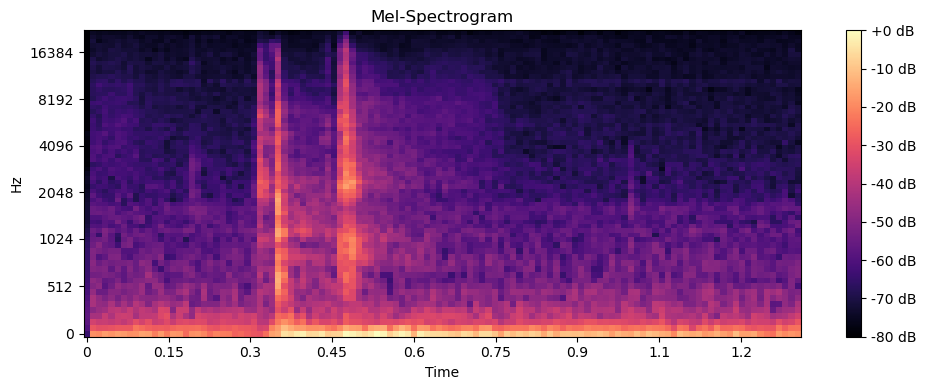

In [11]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load an audio file
filename = '../data/Basem/data/key_data/key_press_space_1720384124_Basem.wav'
samples, sr = librosa.load(filename, sr=None)

# Compute the mel-spectrogram
mel_spec = librosa.feature.melspectrogram(samples, sr=sr, n_mels=64, win_length=1024, hop_length=500)

# Convert to decibels for better visualization
mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

# Plot the mel-spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(mel_spec_db, sr=sr, hop_length=500, x_axis='time', y_axis='mel')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel-Spectrogram')
plt.tight_layout()
plt.show()

TODO:
- Add a name abbreviation for each audio file for the respective folders
- convert Switches to clicky or non clicky
    - Clicky: 
        - Bumpy
        - loud noise
        - Blue, green
    - Tactile:
        Bumpy, moderate noise. You feel the bump before it actuates. Usually no sound (halo clears, mx clears)
        - Brown, clear
    - Linear:
        - Smooth
        - COnsistent, almost no noise
        - Red, Yellow, Black

Sound:
    - Switch itself
    - Heavy the switch itself is
    - Mechanism of switch
    - Case material (plastic, aluminum, brass, combo)
    - Design(hwo much empty space)
    - Floating keycap design or not
    - Keycaps(ABS, PBT)
    - thickness of keycap.
    - shape of keycap
    - Lubed or not
    - Stabilizers present? Are they modded or not?


* **mel-spectrograms** as a method of feature extraction for a DL mode

* Augmentation:
    * Signals were time-shifted randomly by up to 40% in either direction.
        - Helps increase amount of data
    * Mel-spectrograms generated using:
        * 64 mel brands
        * Window length of 1024 samples
        * hop length of 500 (255 for macbook keystrokes, given their shorter length)
        - results in 64x64 images
    * After Mel-spectrograms, complete masking:
        * take random 10% of both time and frequency axis and setting all values within those ranges to the mean of the spectrogram.
            - 'blocking out' a portion of the image.
            - Called SpecAugment and was foudn to encourage the model to generalise and avoid overfitting.
    